In [5]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("data_set.csv")
df.head()

,YEAR,MO,DY,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,PS,WS10M
0,1981,2,1,14.98,11.94,8.79,82.56,5.52,100.03,3.10
1,1981,2,2,15.78,11.65,8.61,78.06,0.04,100.02,2.02
2,1981,2,3,15.36,11.64,8.54,80.38,0.75,100.07,2.30
3,1981,2,4,15.77,11.55,8.54,77.62,0.00,99.94,2.19
4,1981,2,5,16.55,11.87,8.73,76.00,0.00,100.03,2.04


In [8]:
df.shape

(15368, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15368 entries, 0 to 15367
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         15368 non-null  int64  
 1   MO           15368 non-null  int64  
 2   DY           15368 non-null  int64  
 3   T2M          15368 non-null  float64
 4   T2MDEW       15368 non-null  float64
 5   QV2M         15368 non-null  float64
 6   RH2M         15368 non-null  float64
 7   PRECTOTCORR  15368 non-null  float64
 8   PS           15368 non-null  float64
 9   WS10M        15368 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.2 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,15368.0,2001.624219,12.147450,1981.0,1991.0000,2002.00,2012.00,2023.00
MO,15368.0,6.514836,3.451027,1.0,4.0000,7.00,10.00,12.00
DY,15368.0,15.726965,8.799090,1.0,8.0000,16.00,23.00,31.00
T2M,15368.0,23.769878,15.143121,-999.0,19.4975,25.56,28.24,33.86
T2MDEW,15368.0,18.227975,15.535352,-999.0,12.8300,19.44,24.55,27.53
QV2M,15368.0,14.170456,15.094699,-999.0,9.3400,14.34,19.71,23.68
RH2M,15368.0,73.559393,19.248063,-999.0,66.9850,77.00,82.69,94.81
PRECTOTCORR,15368.0,4.656510,17.329175,-999.0,0.0000,0.40,5.04,183.78
PS,15368.0,99.026087,15.353508,-999.0,98.7700,99.25,99.71,100.69
WS10M,15368.0,2.442391,14.013726,-999.0,2.1200,2.57,3.05,9.38


In [11]:
df.isnull().sum()

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
dtype: int64

In [15]:
df.apply(pd.isnull).sum()/df.shape[0]

YEAR           0.0
MO             0.0
DY             0.0
T2M            0.0
T2MDEW         0.0
QV2M           0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS10M          0.0
dtype: float64

In [16]:
weather = df[["YEAR", "MO", "DY", "T2M", "T2MDEW", "QV2M", "RH2M", "PRECTOTCORR", "PS", "WS10M"]].copy()

In [17]:
weather.columns = ["Year", "Month", "Day", "Temp 2M", "Dew 2M", "Spc Hum 2M", "Rel Hum 2M", "Prcp Crctd", "Surf Pressure", "Wind Spd 10M"]

In [18]:
weather

,Year,Month,Day,Temp 2M,Dew 2M,Spc Hum 2M,Rel Hum 2M,Prcp Crctd,Surf Pressure,Wind Spd 10M
0,1981,2,1,14.98,11.94,8.79,82.56,5.52,100.03,3.10
1,1981,2,2,15.78,11.65,8.61,78.06,0.04,100.02,2.02
2,1981,2,3,15.36,11.64,8.54,80.38,0.75,100.07,2.30
3,1981,2,4,15.77,11.55,8.54,77.62,0.00,99.94,2.19
4,1981,2,5,16.55,11.87,8.73,76.00,0.00,100.03,2.04
...,...,...,...,...,...,...,...,...,...,...
15363,2023,2,24,21.04,11.44,8.48,56.12,0.00,99.79,2.77
15364,2023,2,25,21.41,12.61,9.09,60.12,0.00,100.12,3.23
15365,2023,2,26,22.23,12.56,9.09,57.19,0.00,100.15,3.05
15366,2023,2,27,22.27,11.05,8.24,51.31,0.00,100.03,2.59


In [19]:
weather.dtypes

Year               int64
Month              int64
Day                int64
Temp 2M          float64
Dew 2M           float64
Spc Hum 2M       float64
Rel Hum 2M       float64
Prcp Crctd       float64
Surf Pressure    float64
Wind Spd 10M     float64
dtype: object

In [20]:
weather.index

RangeIndex(start=0, stop=15368, step=1)

In [29]:
weather.index = pd.to_datetime(weather.index)

In [38]:
weather = weather.reset_index(drop=True)

In [39]:
weather.index 

RangeIndex(start=0, stop=15368, step=1)

<Axes: >

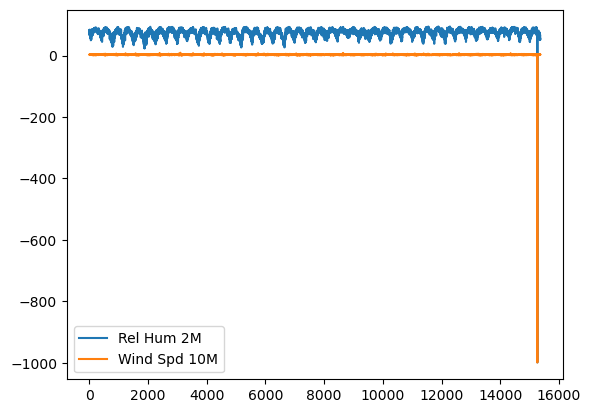

In [44]:
weather[["Rel Hum 2M", "Wind Spd 10M"]].plot()

<Axes: >

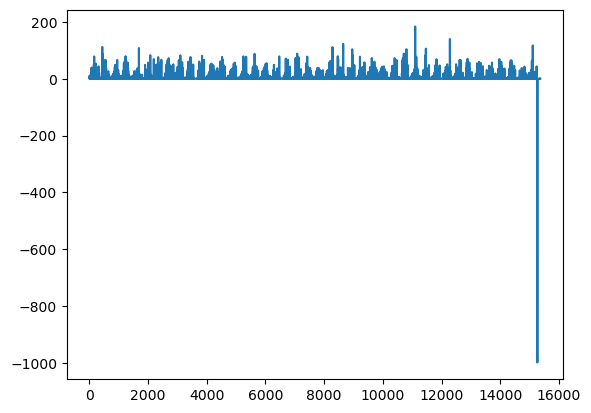

In [46]:
weather["Prcp Crctd"].plot()